## Importing Libraries

In [1]:
# Data Manipulation
import numpy as np
import pandas as pd

# Data preprocessing 
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
from PIL import Image, ImageEnhance

# For Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


#Data Evaluation
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# For ML Models
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.losses import *
from tensorflow.keras.models import *
from tensorflow.keras.metrics import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.applications import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint


# Miscellaneous
from tqdm import tqdm
import os
import random

## Reading the Data

In [2]:
def read_dataset(data_path):
    data = []

    for label in os.listdir(data_path):
        real_label = ""
        if label in ['pituitary_tumor', 'pituitary']: 
            real_label = 'pituitary'
        elif label in ['no_tumor', 'notumor']:
            real_label = 'notumor'
        elif label in ['meningioma', 'meningioma_tumor']:
            real_label = 'meningioma'
        elif label in ['glioma', 'glioma_tumor']:
            real_label = 'glioma'
        for image in os.listdir(os.path.join(data_path,label)):
            data.append([os.path.join(data_path,label,image),real_label])
            
    return data

In [15]:
image_data_paths = "C:\\Users\\tmost\\Documents\\Data-course\\Brain"
train_dir = os.path.join(image_data_paths,"Training")
test_dir = os.path.join(image_data_paths,"Testing")

test_paths = []
test_labels = []

for label in os.listdir(test_dir):
    real_label = ""
    if label in ['pituitary_tumor', 'pituitary']: 
        real_label = 'pituitary'
    elif label in ['no_tumor', 'notumor']:
        real_label = 'notumor'
    elif label in ['meningioma', 'meningioma_tumor']:
        real_label = 'meningioma'
    elif label in ['glioma', 'glioma_tumor']:
        real_label = 'glioma'
    for image in os.listdir(os.path.join(test_dir,label)):
        test_paths.append(os.path.join(test_dir,label,image))
        test_labels.append(real_label)

test_paths, test_labels = shuffle(test_paths, test_labels)

print(f'training image number: {len(test_paths)}')

training image number: 394


## Setting the Base Directory and Subdirectories:

In [3]:
image_data_paths = "C:\\Users\\tmost\\Documents\\Data-course\\Brain" # base directory where the brain image data is located
train_dir = os.path.join(image_data_paths,"Training")
test_dir = os.path.join(image_data_paths,"Testing")


train_data = shuffle(read_dataset(train_dir))
print(f'training image number: {len(train_data)}')

test_data = read_dataset(test_dir)
print(f'test image number: {len(test_data)}')

training image number: 2870
test image number: 394


In [4]:
train_data = pd.DataFrame(train_data, columns = ['image_filepaths', 'tumor_class']).sample(frac = 1, random_state = 42).reset_index(drop = True)
train_data.head()

,image_filepaths,tumor_class
0,C:\Users\tmost\Documents\Data-course\Brain\Tra...,notumor
1,C:\Users\tmost\Documents\Data-course\Brain\Tra...,pituitary
2,C:\Users\tmost\Documents\Data-course\Brain\Tra...,pituitary
3,C:\Users\tmost\Documents\Data-course\Brain\Tra...,meningioma
4,C:\Users\tmost\Documents\Data-course\Brain\Tra...,glioma


## Data Visualization Distribution for each class

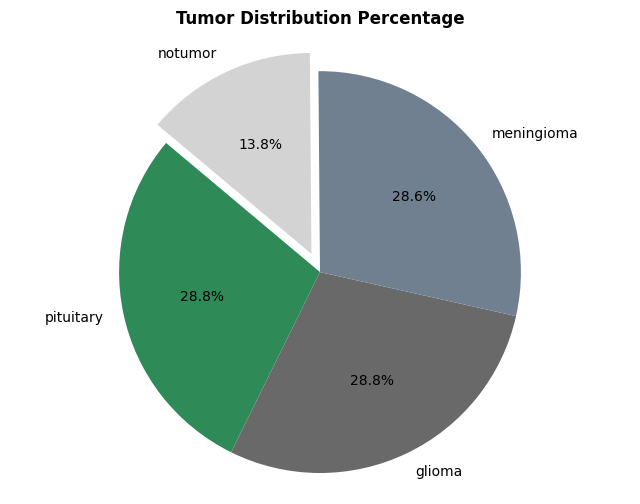

In [14]:
label_counts = train_data['tumor_class'].value_counts().to_dict()  # Count occurrences of each label
total_count = sum(label_counts.values())  
label_percentages = {label: count / total_count * 100 for label, count in label_counts.items()}  

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ['seagreen', 'dimgray', 'slategrey', 'lightgray']
explode = (0, 0,0,0.1) #Explode the 1st slice (optional, for emphasis)
plt.pie(label_percentages.values(), labels=label_percentages.keys(), autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Tumor Distribution Percentage',weight='bold')
plt.show()

In [16]:
test_data = pd.DataFrame(test_data, columns = ['image_filepaths', 'tumor_class']).sample(frac = 1, random_state = 42).reset_index(drop = True)
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 394 entries, 0 to 393
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   image_filepaths  394 non-null    object
 1   tumor_class      394 non-null    object
dtypes: object(2)
memory usage: 6.3+ KB


In [21]:
label_counts = test_data['tumor_class'].value_counts().to_dict()  # Count occurrences of each label
total_count = sum(label_counts.values())  
label_percentages = {label: count / total_count * 100 for label, count in label_counts.items()}  
label_percentages

{'meningioma': 29.187817258883246,
 'notumor': 26.649746192893403,
 'glioma': 25.380710659898476,
 'pituitary': 18.781725888324875}

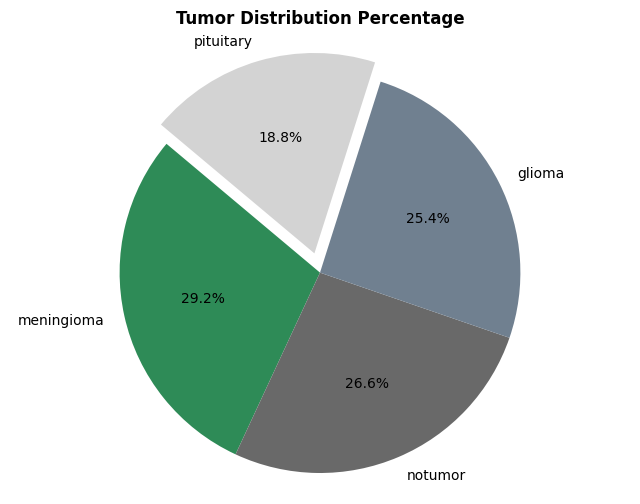

In [18]:
label_counts = test_data['tumor_class'].value_counts().to_dict()  # Count occurrences of each label
total_count = sum(label_counts.values())  
label_percentages = {label: count / total_count * 100 for label, count in label_counts.items()}  

# Create a pie chart
plt.figure(figsize=(8, 6))
colors = ['seagreen', 'dimgray', 'slategrey', 'lightgray']
explode = (0, 0,0,0.1) #Explode the 1st slice (optional, for emphasis)
plt.pie(label_percentages.values(), labels=label_percentages.keys(), autopct='%1.1f%%', startangle=140, colors=colors, explode=explode)

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Tumor Distribution Percentage',weight='bold')
plt.show()

In [ ]:
train_data, val_data = train_test_split(train_data, 
                                               train_size = 0.80, 
                                               random_state = 42, 
                                               stratify = train_data.tumor_class)

In [ ]:
train_data.shape

In [ ]:
test_data.shape

## Data Agumentation

- Image augmentation is usually used to increase the image dataset and also to make the network more robust against translation invariance. 



- Image augmentation is defined as creating duplicates of the original image datasets by flipping, rotating, zooming, and adjusting brightness.

- Convert from NumPy to PIL

- Enhance Brightness and contrast

- After PIL transformation, Convert back to NumPy array and pixel are normalized 

def augment_image(image):
    image = Image.fromarray(np.uint8(image)) #convert this NumPy array to a PIL Image(python image library), unit8[0-255]
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.8,1.2)) 
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.8,1.2))
    image = np.array(image)/255.0  # converted back to  NumPy array and Normalize
    return image

def augment_image(image):
    # Convert NumPy array to a PIL Image
    #image = Image.fromarray(np.uint8(image))
    
    # Apply Keras-style augmentations
    image = image.rotate(random.uniform(-15, 15))
    image = image.transpose(method = Image.FLIP_LEFT_RIGHT) if random.choice([True, False]) else image
    #image = image.transpose(method = Image.FLIP_TOP_BOTTOM) if random.choice([True, False]) else image
    
    # Apply additional custom augmentations
    image = ImageEnhance.Brightness(image).enhance(random.uniform(0.3, 1.5))
    image = ImageEnhance.Contrast(image).enhance(random.uniform(0.3, 1.5))
    
    

  
    
    return image

IMAGE_SIZE = 128

def open_images(paths, aug=False):
    '''
    Given a list of paths to images, this function returns the images as arrays (after augmenting them)
    '''
    images = []
    for path in paths:
        image = load_img(path, target_size=(IMAGE_SIZE,IMAGE_SIZE))  #load and resize
        if aug:
            image = augment_image(image) # apply data augmentation to each image
        # Convert to NumPy array and normalize
        image = np.array(image) / 255.0
        images.append(image) #append the augumented image to the image list
    return np.array(images)  #return an array

images = open_images(train_paths[11:20])
labels = train_labels[50:59]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 9):
    fig.add_subplot(2, 4, x)
    plt.axis('off')
    plt.title(labels[x])
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 12})
plt.show()

In [ ]:
image_size = 128
batch_size = 32

train_image_datagen_kwargs = dict(rescale = 1 / 255,
                                rotation_range = 15, 
                                width_shift_range = 0.1, 
                                zoom_range = 0.01, 
                                shear_range = 0.01,
                                brightness_range = [0.3, 1.5],
                                horizontal_flip = True,
                                vertical_flip = True)

test_image_datagen_kwargs = dict(rescale = 1 / 255)

In [ ]:
train_image_datagen = ImageDataGenerator(**train_image_datagen_kwargs)
val_image_datagen = ImageDataGenerator(**test_image_datagen_kwargs)
test_image_datagen = ImageDataGenerator(**test_image_datagen_kwargs)

In [ ]:
train_dataset = train_image_datagen.flow_from_dataframe(train_data, 
                                                        x_col = 'image_filepaths', 
                                                        y_col = 'tumor_class', 
                                                        seed = 42, 
                                                        batch_size = batch_size,
                                                        target_size = (image_size, image_size),
                                                        color_mode = 'rgb')

val_dataset = val_image_datagen.flow_from_dataframe(val_data, 
                                                        x_col = 'image_filepaths', 
                                                        y_col = 'tumor_class', 
                                                        seed = 42, 
                                                        batch_size = batch_size,
                                                        target_size = (image_size, image_size),
                                                        color_mode = 'rgb')


test_dataset = test_image_datagen.flow_from_dataframe(test_data, 
                                                      x_col = 'image_filepaths', 
                                                      y_col = 'tumor_class', 
                                                      seed = 42, 
                                                      batch_size = batch_size,
                                                      target_size = (image_size, image_size),
                                                      color_mode = 'rgb')

In [ ]:
early_stopping = EarlyStopping(monitor = 'val_accuracy', patience = 10)

In [ ]:
base_model = VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet') 
# Set all layers to non-trainable
for layer in base_model.layers:  # loop through all layers in VGG16
    layer.trainable = False    
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True   #unfreeze the last 3 layers
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True


# build a custom model of VGG16
model = Sequential()    
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3))) # add input layer with the specified shape
model.add(base_model) #Adds the pre-trained VGG16 base model to the model.
model.add(Flatten())  #Flattens the output of the VGG16 base
model.add(Dropout(0.3)) # Applies dropout with a rate of 0.3 to reduce overfitting.
model.add(Dense(128, activation='relu')) # Adds a fully connected layer with 128 units and ReLU activation.
model.add(Dropout(0.2)) # Applies another dropout with a rate of 0.2.
model.add(Dense(len(unique_labels), activation='softmax')) #adds the final dense layer

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='categorical_crossentropy',
             metrics=['categorical_accuracy'])

In [ ]:
#with tf.device(gpu_device_location) if gpu_device_location else tpu_strategy.scope() if tpu_device_location else tf.device(cpu_device_location):
train_history = model.fit(train_dataset,
                          batch_size = batch_size,
                          validation_data = val_dataset,
                          epochs = 10, 
                          callbacks = [early_stopping])

## Data Generator

- Given a list of paths to images, and the labels,
- this function augments the images, normalizes them, encodes the label, and then returns the batch on which the model can train on.

In [ ]:
unique_labels = ['glioma','meningioma','notumor','pituitary']#os.listdir(train_dir)


def encode_label(labels): # encode for feeding to ML
    encoded = []
    for x in labels:
        encoded.append(unique_labels.index(x)) 
    return np.array(encoded)

def decode_label(labels):  #decode to be interpretation  
    decoded = []
    for x in labels:
        decoded.append(unique_labels[x])
    return np.array(decoded)

def datagen(paths, labels, batch_size=12, epochs=1, aug=False): #use data generator to efficiently load and process data in baches during training
    for _ in range(epochs):
        for x in range(0, len(paths), batch_size):
            batch_paths = paths[x:x+batch_size]
            batch_images = open_images(batch_paths, aug=aug)
            batch_labels = labels[x:x+batch_size]
            batch_labels = encode_label(batch_labels)
            yield batch_images, batch_labels

- VGG is a CNN model, use for imgae classification task, conv layer --> max pooling layers --> deep structure

- Fully connected layer(top layers) -> exclude (the top layerd are often task specific, not directly tailored to a specific requirnments)


- Fearure Extraction: the low layer of pretrained model capture a general feature-> so useful for variety of task


- by excluding the top layers, you can leverage the lower layer for feature extraction and add your own classification layers for new task

- Use VGG16 for transfer learning, 

- Transfer learning, using knowledge from pre-trained model to improve performance

- trainable = False, layer --> Frozen (the weight of that layers will not update during the training)

- why? Reserving pre_Trained Knowledge,Reduce Training time, Avoiding overfitting

- so froyzen layers, it's a common practice in transfer learning

## Model

In [ ]:
base_model = VGG16(input_shape=(IMAGE_SIZE,IMAGE_SIZE,3), include_top=False, weights='imagenet') 
# Set all layers to non-trainable
for layer in base_model.layers:  # loop through all layers in VGG16
    layer.trainable = False    
# Set the last vgg block to trainable
base_model.layers[-2].trainable = True   #unfreeze the last 3 layers
base_model.layers[-3].trainable = True
base_model.layers[-4].trainable = True


# build a custom model of VGG16
model = Sequential()    
model.add(Input(shape=(IMAGE_SIZE,IMAGE_SIZE,3))) # add input layer with the specified shape
model.add(base_model) #Adds the pre-trained VGG16 base model to the model.
model.add(Flatten())  #Flattens the output of the VGG16 base
model.add(Dropout(0.3)) # Applies dropout with a rate of 0.3 to reduce overfitting.
model.add(Dense(128, activation='relu')) # Adds a fully connected layer with 128 units and ReLU activation.
model.add(Dropout(0.2)) # Applies another dropout with a rate of 0.2.
model.add(Dense(len(unique_labels), activation='softmax')) #adds the final dense layer

In [ ]:
model.summary()

In [ ]:
keras.utils.plot_model(model, show_shapes=True)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
             loss='sparse_categorical_crossentropy',
             metrics=['sparse_categorical_accuracy'])

In [ ]:
%%time
batch_size = 25
steps = int(len(train_paths)/batch_size)
epochs = 10
history = model.fit(datagen(train_paths, train_labels, batch_size=batch_size, epochs=epochs, aug=True),epochs=epochs, steps_per_epoch=steps)


In [ ]:
plt.figure(figsize=(8,4))
plt.grid(True)
plt.plot(history.history['sparse_categorical_accuracy'], '.g-', linewidth=2)
plt.plot(history.history['loss'], '.r-', linewidth=2)
plt.title('Model Training History')
plt.xlabel('epoch')
plt.xticks([x for x in range(epochs)])
plt.legend(['Accuracy', 'Loss'], loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

## Evaluate Model with test samples

In [ ]:
batch_size = 32
steps = int(len(test_paths)/batch_size)
y_pred = []
y_true = []
for x, y in tqdm(datagen(test_paths, test_labels, batch_size=batch_size, epochs=1, aug=True), total=steps):
    pred = model.predict(x)
    pred = np.argmax(pred, axis=-1)
    for i in decode_label(pred):
        y_pred.append(i)
    for i in decode_label(y):
        y_true.append(i)

In [ ]:
test_paths

In [ ]:
# confusion_matrix

conf_matrix = confusion_matrix(y_true, y_pred)
print(conf_matrix)

In [ ]:
# Your confusion matrix data
conf_matrix_data = np.array(conf_matrix)
                            #[[27, 42, 29, 2],
                            #[6, 88, 13, 8],
                            #[4, 3, 98, 0],
                            #[5, 10, 9, 50]])

# Plotting the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_data, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=unique_labels,
            yticklabels=unique_labels)

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()



- The plot has the True labels on the y-axis and Predicted labels on the x-axis, as defined by the confusion_matrix function call.



- For Glioma (Class 0): The model correctly identified 18 instances of Glioma (TP), but there were 82 instances misclassified as other classes ('meningioma', 'notumor', or 'pituitary').


- For Meningioma (Class 1): The model correctly identified 114 instances of Meningioma (TP), and there was only 1 misclassification.



- No Tumor (Class 2):The model correctly identified 104 instances of No Tumor (TP), and there was only 1 misclassification.



- Pituitary (Class 3) : The model correctly identified 55 instances of Pituitary (TP), but there were 19 instances misclassified as other classes.



- In conclusion, The model has a noticeable number of misclassifications, especially in the 'glioma' class (Class 0) and the 'pituitary' class (Class 3).



- Further analysis, such as examining precision, recall, and F1-score for each class, could provide a more comprehensive evaluation of the model's strengths and weaknesses. Additionally, fine-tuning the model, adjusting hyperparameters, or using more advanced architectures may help improve performance.


In [ ]:
print(classification_report(y_true, y_pred))

In [ ]:
# Save the VGG16 model
save_path = 'C:\\Users\\tmost\\Documents\\Data-course\\Brain\\saved_models'
model.save(os.path.join(save_path, 'vgg16_model.h5'))

In [ ]:
FP =[]
for i, y in enumerate(y_pred):
    if y != y_true[i]:
        FP.append(i)
        
FP_paths = []
FP_labels = []


for y in FP: 
    FP_paths.append(test_paths[y])
    FP_labels.append(y_true[y]+'-'+y_pred[y])
    

In [ ]:
IMAGE_SIZE = 128


images = open_images(FP_paths[0:20])
labels = FP_labels[0:20]
fig = plt.figure(figsize=(12, 6))
for x in range(1, 19):
    fig.add_subplot(4, 6, x)
    plt.axis('off')
    plt.title(labels[x], fontsize=8)
    plt.imshow(images[x])
plt.rcParams.update({'font.size': 8})
plt.show()

In [ ]:
import h5py
mat_file = h5py.File(r'C:\\Users\tmost\Documents\Data-course\Brain\brain_tumor_dataset\cvind.mat')
arrays = {}
for k, v in mat_file.items():
    arrays[k] = np.array(v)

In [ ]:
arrays